In [1]:
import cv2
import numpy as np
import os

In [2]:
# Importing the necessary libraries for the project.
import numpy as np
import cv2
import os
import keras
import matplotlib
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
# Defining the path to directory of the data set.
train_path = r"C:/Users/Manan Patel/Data_Mining Project/data/train"
validation_path = r"C:/Users/Manan Patel/Data_Mining Project/data/validation"
test_path = r"C:/Users/Manan Patel/Data_Mining Project/data/test"

gen_params = {"featurewise_center":False,\
              "samplewise_center":False,\
              "featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,\
              "zca_whitening":False,\
              "rotation_range":45,\
              "width_shift_range":0.1,\
              "height_shift_range":0.1,\
              "shear_range":0.1, \
              "zoom_range": [1.5,1.5],\
              "horizontal_flip":True,\
              "vertical_flip":False\
               }
train_batches = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), class_mode='categorical', batch_size=240, interpolation="nearest",shuffle=True)
validation_batches = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=validation_path, target_size=(224,224), class_mode='categorical', batch_size=120, interpolation="nearest",shuffle=True)
test_batches = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,  target_size=(224,224),  class_mode='categorical',  batch_size=60, interpolation="nearest", shuffle=True)


Found 8000 images belonging to 4 classes.
Found 1240 images belonging to 4 classes.
Found 1240 images belonging to 4 classes.


Actual label on a small set of train data--



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

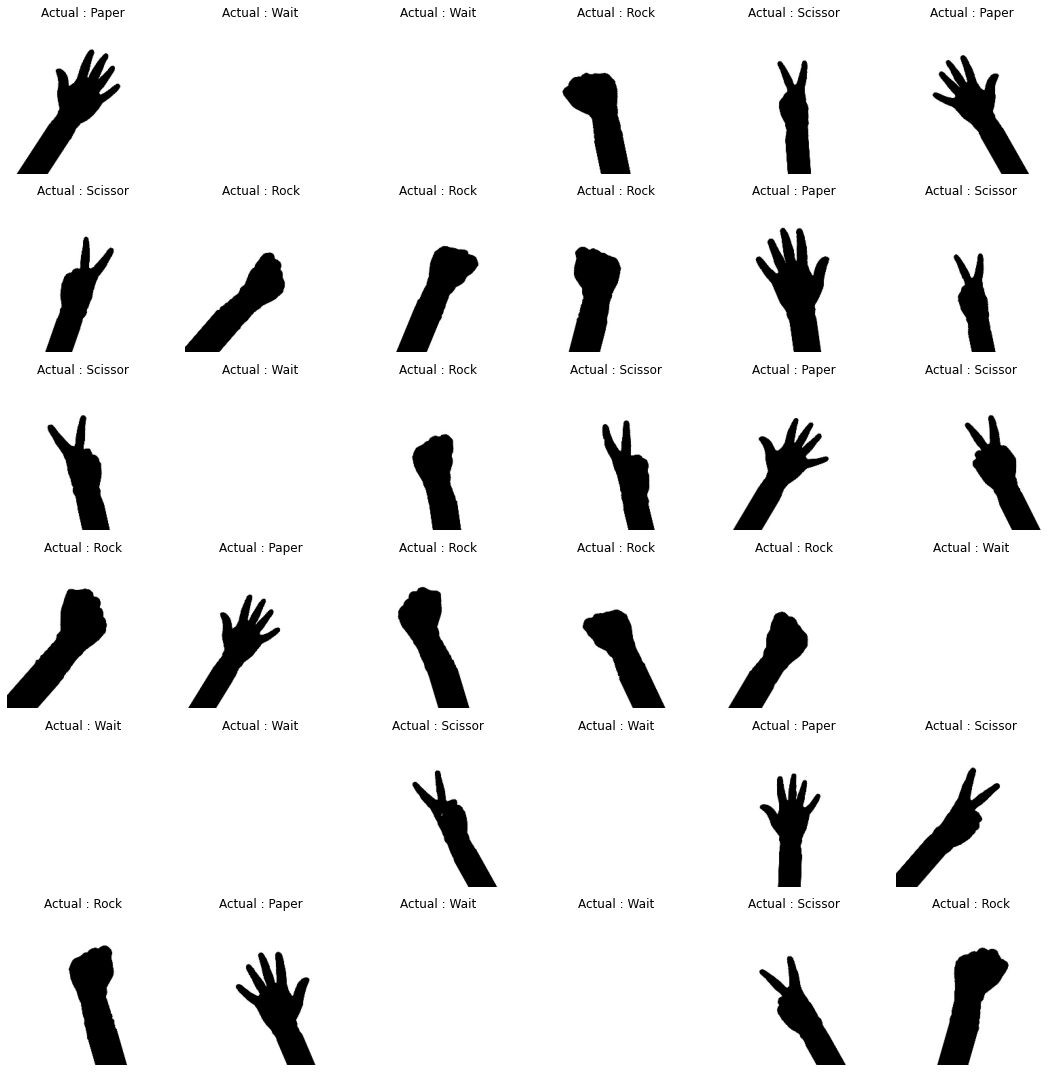

In [5]:
# Defining the label to the dataset
word_dict = {0:'Paper',1:'Rock',2:'Scissor',3:'Wait'}

# Getting a set of train batch from the dataset
imgs, labels = next(train_batches)

print("Actual label on a small set of train data--")
print("")

fig, axes = plt.subplots(6, 6, figsize=(15,15))
axes = axes.flatten()
count = 0

for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Actual : %s" %(word_dict[np.argmax(labels[count])] ))  #label[count]
    count = count + 1
plt.tight_layout()
plt.show()

In [6]:
model_name = "C:/Users/Manan Patel/Data_Mining Project/TR_Test36.h5"

In [7]:
base_model = tf.keras.applications.MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False) 
base_model.trainable = False   # Keeping the initial layer freeze from the training.

In [8]:
x1 = base_model(base_model.input, training = False)   # Keeping the CNN mode layer freeze.
x2 = tf.keras.layers.Flatten()(x1)   # Flattening the data.
x3 = tf.keras.layers.Dense(10,activation = 'relu')(x2)
out = tf.keras.layers.Dense(4,activation = 'softmax')(x3)   # Defining the output layer for 4 class.
model = tf.keras.Model(inputs = base_model.input, outputs =out)

# Printing the model summary.
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                501770    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 3,730,678
Trainable params: 501,814
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [9]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])   # Using SGD optimizer
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00005)   # Reducing the learning rate by 80 %.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')   # Callback for early stop.

In [10]:
history = model.fit(train_batches, epochs=10, verbose = 1, callbacks=[reduce_lr, early_stop],  validation_data = validation_batches)

Epoch 1/10
34/34 [==============================] - 174s 5s/step - loss: 0.2442 - accuracy: 0.9565 - val_loss: 0.0784 - val_accuracy: 0.9911
Epoch 2/10
34/34 [==============================] - 156s 5s/step - loss: 0.0324 - accuracy: 0.9998 - val_loss: 0.0480 - val_accuracy: 0.9944
Epoch 3/10
34/34 [==============================] - 155s 5s/step - loss: 0.0183 - accuracy: 0.9999 - val_loss: 0.0383 - val_accuracy: 0.9927
Epoch 4/10
34/34 [==============================] - 155s 5s/step - loss: 0.0131 - accuracy: 0.9998 - val_loss: 0.0291 - val_accuracy: 0.9968
Epoch 5/10
34/34 [==============================] - 155s 5s/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 0.9984
Epoch 6/10
34/34 [==============================] - 156s 5s/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9976
Epoch 7/10
34/34 [==============================] - 154s 5s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9976
Epoch 8/10
34

In [11]:
model.save("C:/Users/Manan Patel/Data_Mining Project/TR_Test36.h5")  # Saving the model

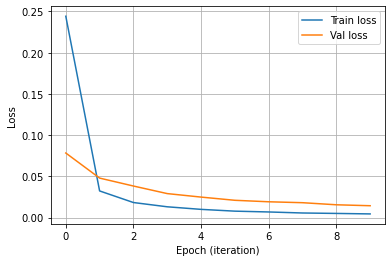

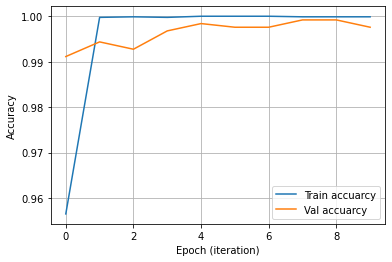

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# history = model
# acc = history.history['loss'] 
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [12]:
model = tf.keras.models.load_model(model_name)
model.trainable = True  # Training the whole model for fine tuning

model.compile(optimizer=SGD(learning_rate=0.00000001), loss='categorical_crossentropy', metrics=['accuracy'])   # Using SGD model optimizer
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00005)   # Learning rate reduction by 80%
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='min')  # Early stop callback

# Model Summary
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                501770    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 3,730,678
Trainable params: 3,708,790
Non-trainable params: 21,888
_________________________________________________________________
None


In [13]:
history = model.fit(train_batches, epochs=2, verbose = 1, callbacks=[reduce_lr, early_stop],  validation_data = validation_batches)

Epoch 1/2
34/34 [==============================] - 1041s 31s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9976
Epoch 2/2
34/34 [==============================] - 1104s 32s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9960


In [14]:
model.save("C:/Users/Manan Patel/Data_Mining Project/TR_Test24.h5")  # Saving the model
model = keras.models.load_model("C:/Users/Manan Patel/Data_Mining Project/TR_Test24.h5")

In [15]:
# For getting next batch of testing imgs...
imgs, labels = next(test_batches)

predictions = model.predict(imgs, verbose=0)

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 0.0037300626281648874; accuracy of 100.0%


predictions on a small set of test data--



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

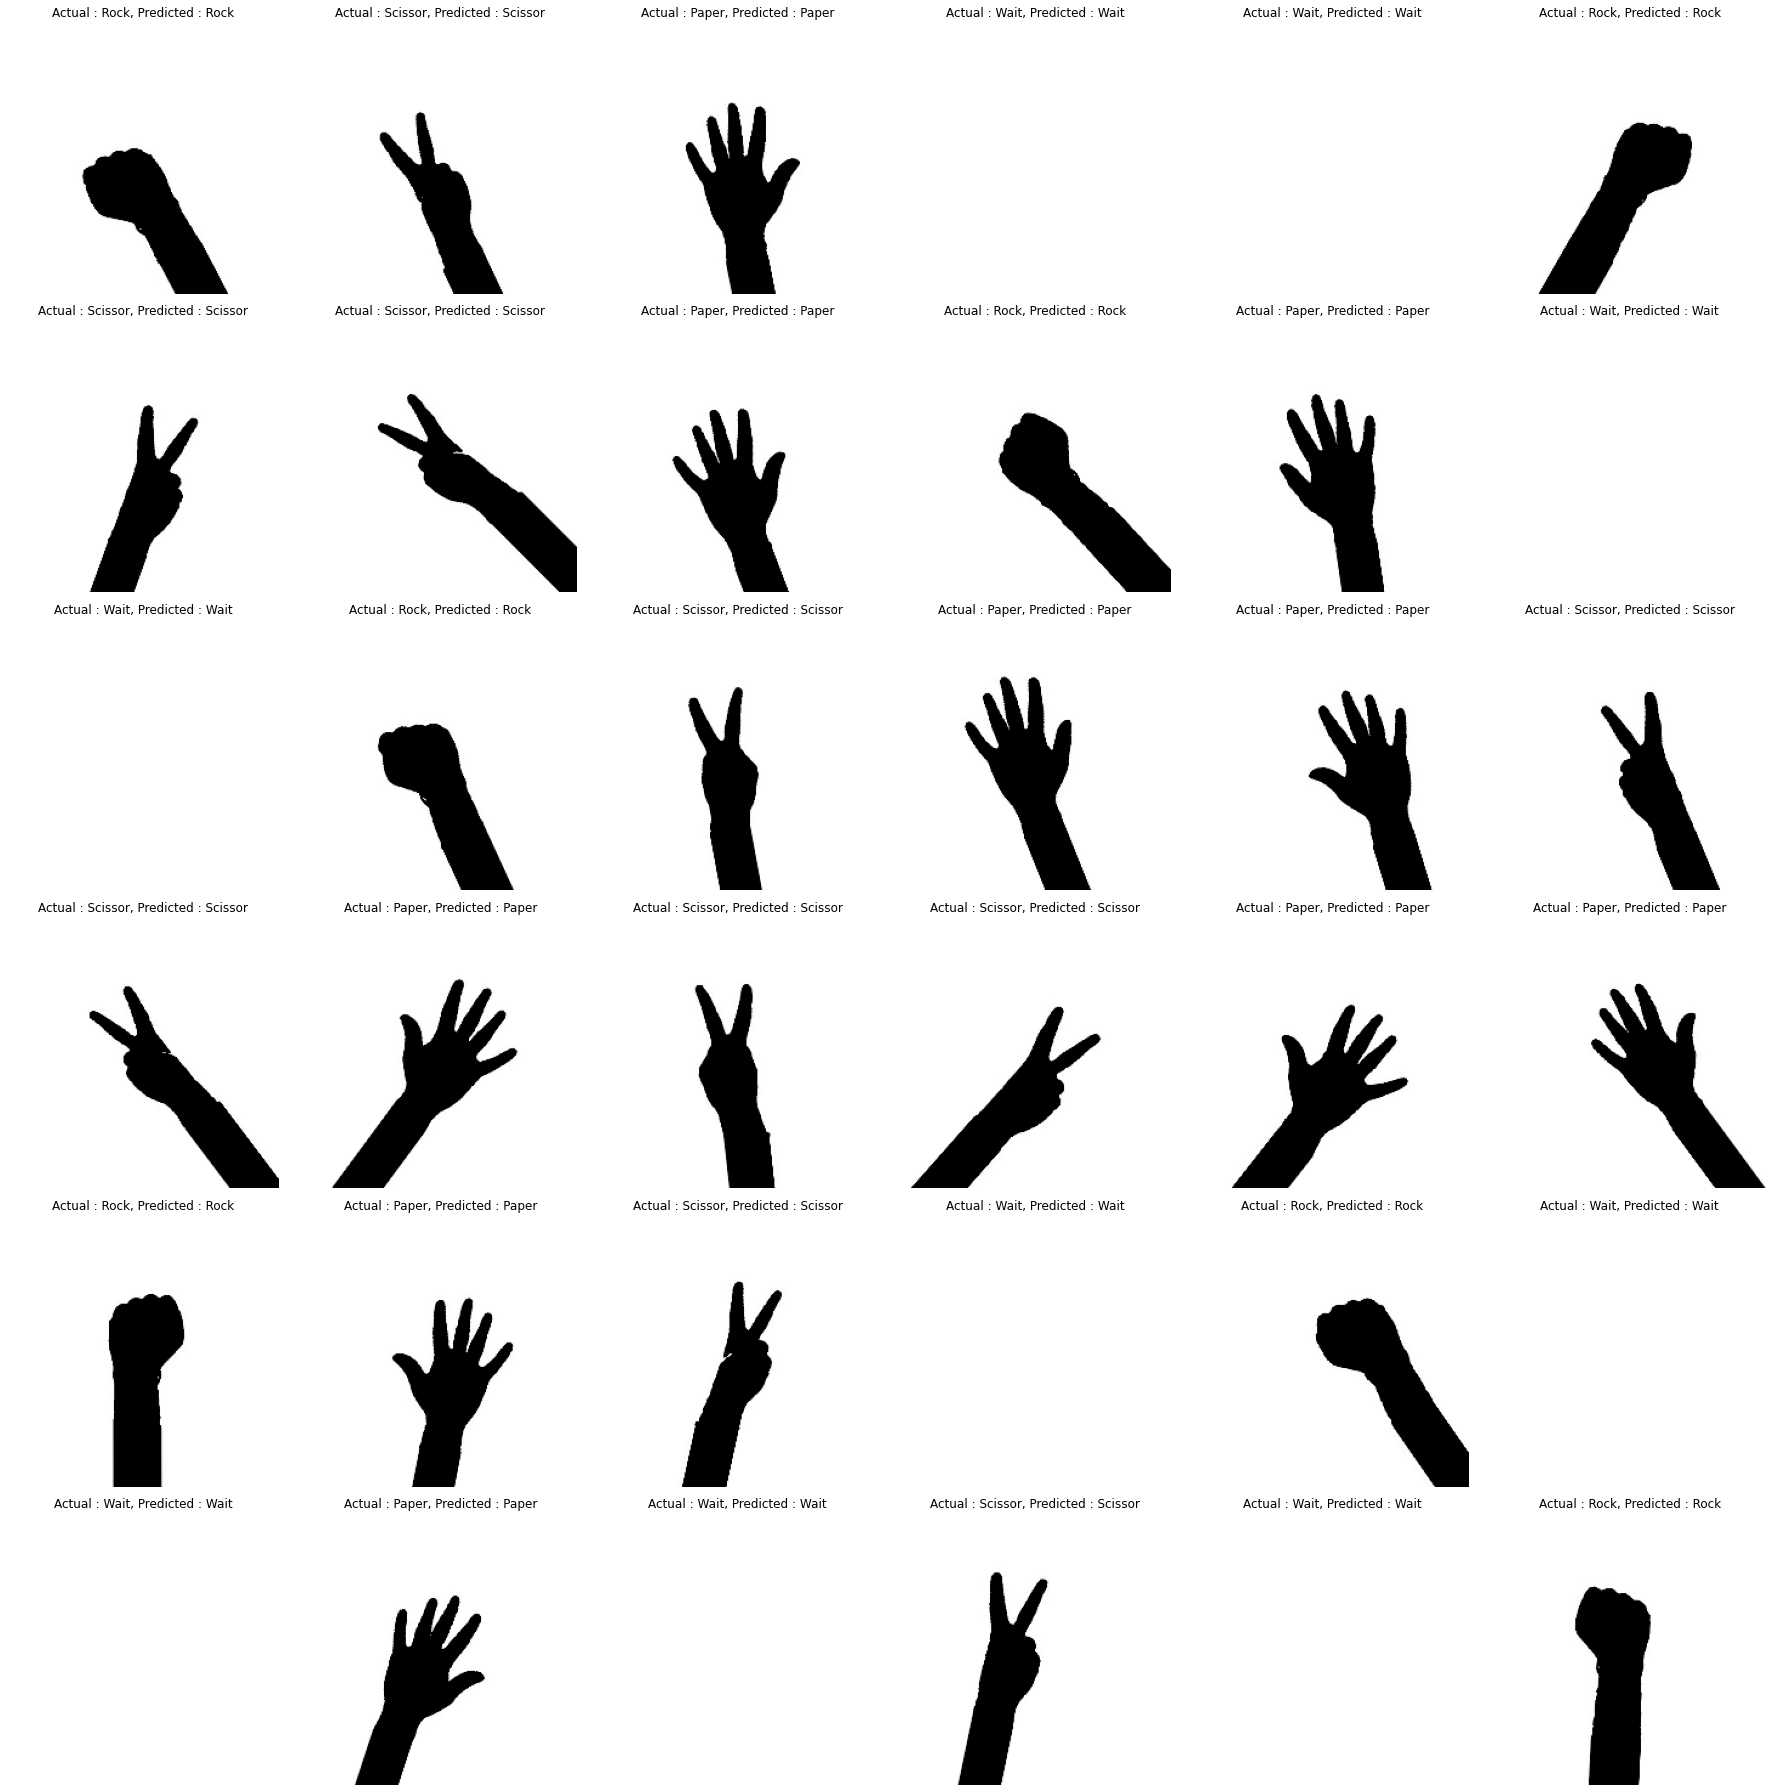

In [16]:
#Defining the lables for the output.
word_dict = {0:'Paper',1:'Rock',2:'Scissor',3:'Wait'}

#Getting the test batch for the prediction.
imgs, labels = next(test_batches)

# Output prediction
predictions = model.predict(imgs, verbose=0)

print("predictions on a small set of test data--")
print("")

fig, axes = plt.subplots(6, 6, figsize=(25,25))
axes = axes.flatten()
count = 0
i = np.array(predictions)
for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Actual : %s, Predicted : %s" %(word_dict[np.argmax(labels[count])], word_dict[np.argmax(i[count])]))  #label[count]
    count = count + 1
plt.tight_layout()
plt.show()

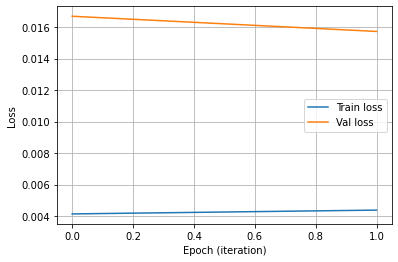

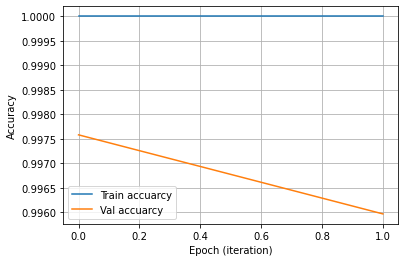

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# history = model
# acc = history.history['loss'] 
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()